In [1]:
#importing
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold

In [2]:
#loading data
df_numeric = pd.read_csv('df_numeric.csv')

In [3]:
df_numeric.head(5)

MSSubClass  LotFrontage  LotArea  Street  LotShape  Utilities  LandSlope  \
0          60         65.0     8450       2         4          4          3   
1          20         80.0     9600       2         4          4          3   
2          60         68.0    11250       2         3          4          3   
3          70         60.0     9550       2         3          4          3   
4          60         84.0    14260       2         3          4          3   

   OverallQual  OverallCond  YearBuilt  ...  MoSold  YrSold  SalePrice  \
0            7            5       2003  ...       2    2008     208500   
1            6            8       1976  ...       5    2007     181500   
2            7            5       2001  ...       9    2008     223500   
3            7            5       1915  ...       2    2006     140000   
4            8            5       2000  ...      12    2008     250000   

   GarageYrBlt_missing_ind  LotFrontage_missing_ind  MasVnrArea_missing_ind  \
0                        0                        0                       0   
1                        0                        0                       0   
2                        0                        0                       0   
3                        0                        0                       0   
4                        0                        0                       0   

   1stFlrSF_log  1stFlr_2ndFlr_SF  OverallGrade  SimplGarageQual  
0      6.752270              1710            35                1  
1      7.140453              1262            48                1  
2      6.824374              1786            35                1  
3      6.867974              1717            35                1  
4      7.043160              2198            40                1  

[5 rows x 60 columns]

In [4]:
print(f"there are {df_numeric.shape[1]} features and {df_numeric.shape[0]} observations in dataset.")

there are 60 features and 1458 observations in dataset.


### Steps
1. Use features selections techniques to select significant features(corr threshold and low variance features) in our dataset
2. develop Model with significant features
3. add one by one other non-significant features to our Model to see how R-squared and adjust R-squared change

In [5]:
# removes all features whose variance doesn’t meet some threshold. 
#By default, it removes all zero-variance features, 
#i.e. features that have the same value in all samples.
vt = VarianceThreshold(0.25)
df_transformed = vt.fit_transform(df_numeric)

In [6]:
df_transformed

array([[6.00000e+01, 6.50000e+01, 8.45000e+03, ..., 2.08500e+05,
        1.71000e+03, 3.50000e+01],
       [2.00000e+01, 8.00000e+01, 9.60000e+03, ..., 1.81500e+05,
        1.26200e+03, 4.80000e+01],
       [6.00000e+01, 6.80000e+01, 1.12500e+04, ..., 2.23500e+05,
        1.78600e+03, 3.50000e+01],
       ...,
       [7.00000e+01, 6.60000e+01, 9.04200e+03, ..., 2.66500e+05,
        2.34000e+03, 6.30000e+01],
       [2.00000e+01, 6.80000e+01, 9.71700e+03, ..., 1.42125e+05,
        1.07800e+03, 3.00000e+01],
       [2.00000e+01, 7.50000e+01, 9.93700e+03, ..., 1.47500e+05,
        1.25600e+03, 3.00000e+01]])

In [7]:
#return True or False coresponding to variance threshold drop off columns above
#False means that feature dropped from dataset
vt.get_support()

array([ True,  True,  True, False,  True, False, False,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False,  True,  True, False])

In [8]:
#get all features has variance higher than threshold
selected_columns = df_numeric.columns[vt.get_support()]
###
df_variance = pd.DataFrame(df_transformed, columns = selected_columns)

In [9]:
df_variance.head(5)

MSSubClass  LotFrontage  LotArea  LotShape  OverallQual  OverallCond  \
0        60.0         65.0   8450.0       4.0          7.0          5.0   
1        20.0         80.0   9600.0       4.0          6.0          8.0   
2        60.0         68.0  11250.0       3.0          7.0          5.0   
3        70.0         60.0   9550.0       3.0          7.0          5.0   
4        60.0         84.0  14260.0       3.0          8.0          5.0   

   YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  ...  EnclosedPorch  \
0     2003.0        2003.0       196.0        4.0  ...            0.0   
1     1976.0        1976.0         0.0        3.0  ...            0.0   
2     2001.0        2002.0       162.0        4.0  ...            0.0   
3     1915.0        1970.0         0.0        3.0  ...          272.0   
4     2000.0        2000.0       350.0        4.0  ...            0.0   

   3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SalePrice  \
0        0.0          0.0       0.0      0.0     2.0  2008.0   208500.0   
1        0.0          0.0       0.0      0.0     5.0  2007.0   181500.0   
2        0.0          0.0       0.0      0.0     9.0  2008.0   223500.0   
3        0.0          0.0       0.0      0.0     2.0  2006.0   140000.0   
4        0.0          0.0       0.0      0.0    12.0  2008.0   250000.0   

   1stFlr_2ndFlr_SF  OverallGrade  
0            1710.0          35.0  
1            1262.0          48.0  
2            1786.0          35.0  
3            1717.0          35.0  
4            2198.0          40.0  

[5 rows x 48 columns]

In [10]:
#get correlations between features
df_corr = df_variance.corr().abs()

In [11]:
#plotting df_corr
df_corr.style.background_gradient(cmap='coolwarm').format(precision=2)

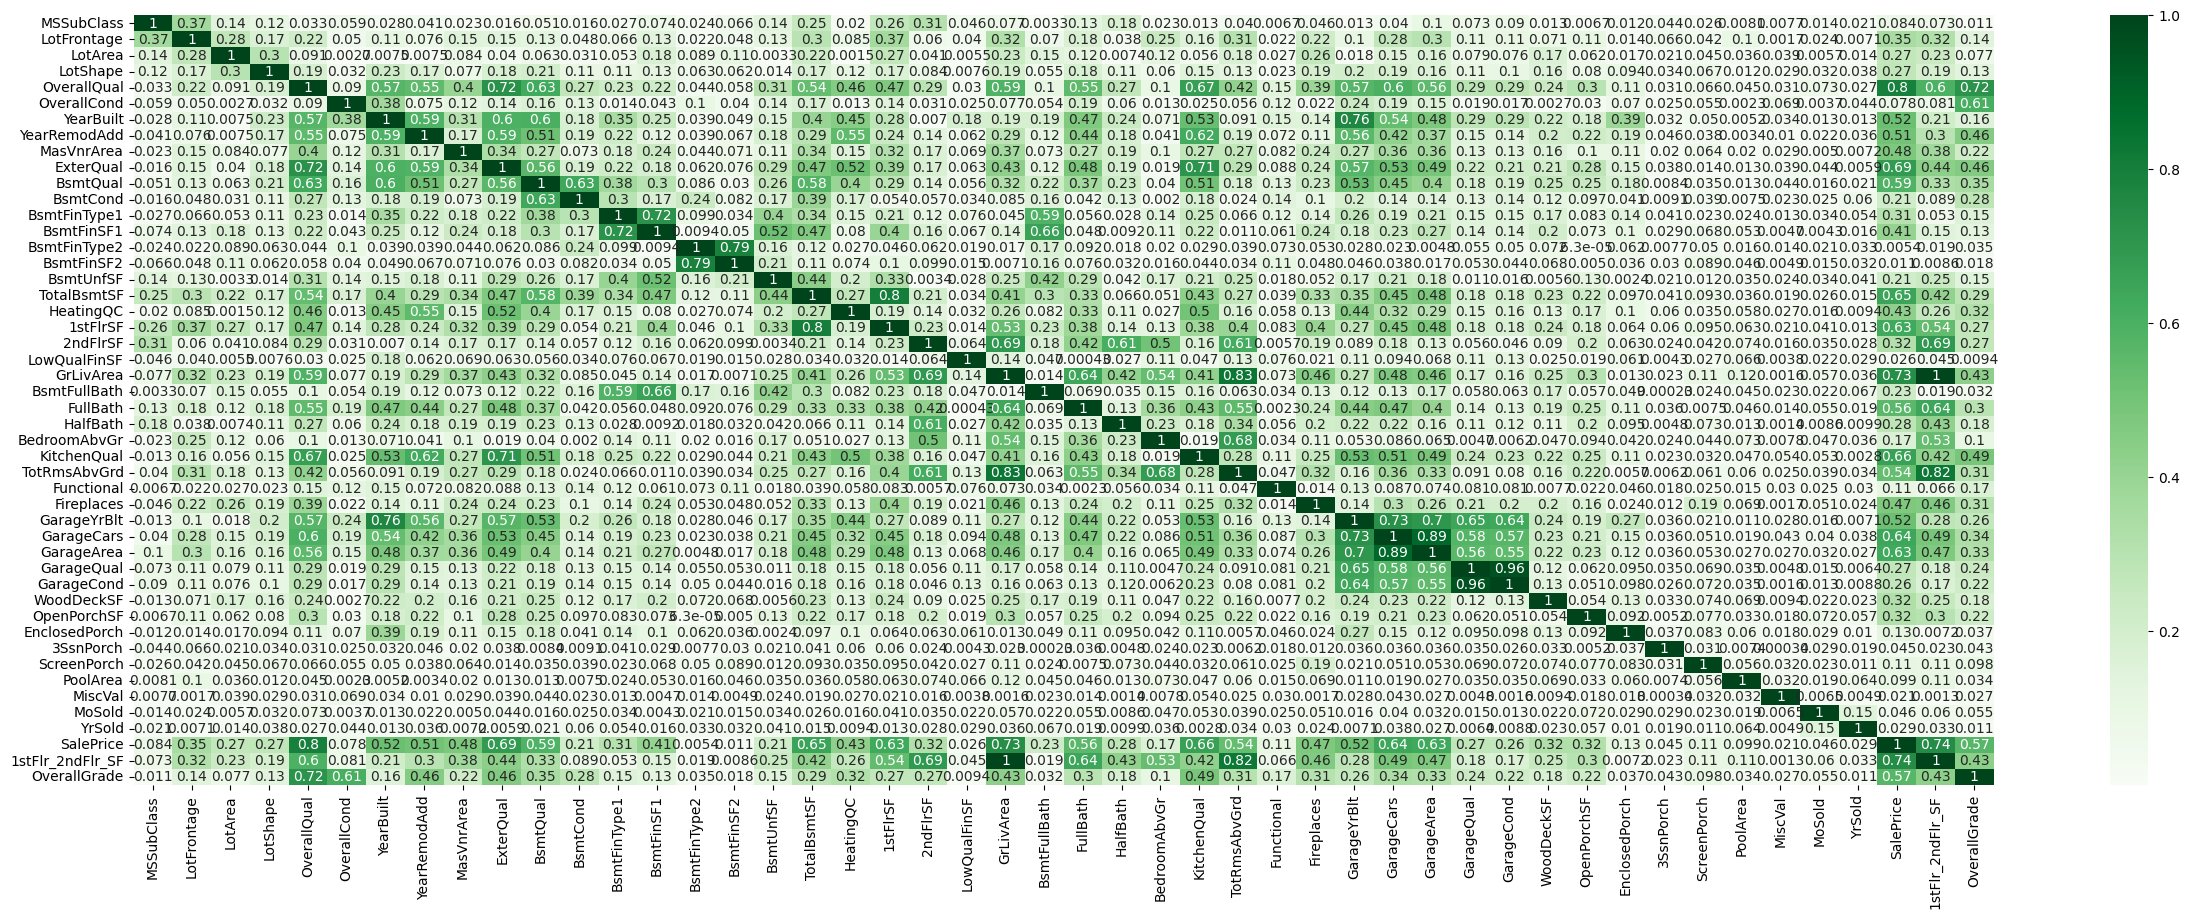

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30,10))
sns.heatmap(df_corr, cmap="Greens",annot=True)
plt.show()

In [13]:
#more capable, interactive and easier to use alternatives.
import plotly.express as px

#####
fig = px.imshow(df_corr)
fig.show()

In [14]:
df_numeric.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'LotShape',
       'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual',
       'BsmtCond', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'GarageYrBlt_missing_ind',
       'LotFrontage_missing_ind', 'MasVnrArea_missing_ind', '1stFlrSF_log',
       '1stFlr_2ndFlr_SF', 'OverallGrade', 'SimplGarageQual'],
      dtype='object')

In [15]:
df_variance.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual',
       'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice',
       '1stFlr_2ndFlr_SF', 'OverallGrade'],
      dtype='object')

In [16]:
#dropped features in df_numeric
low_variances_col = [name for name in df_numeric.columns if name not in df_variance.columns]
print("dropped features in df_numeric",low_variances_col)

dropped features in df_numeric ['Street', 'Utilities', 'LandSlope', 'ExterCond', 'BsmtHalfBath', 'KitchenAbvGr', 'PavedDrive', 'GarageYrBlt_missing_ind', 'LotFrontage_missing_ind', 'MasVnrArea_missing_ind', '1stFlrSF_log', 'SimplGarageQual']


In [17]:
print(df_corr.columns)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual',
       'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice',
       '1stFlr_2ndFlr_SF', 'OverallGrade'],
      dtype='object')


In [18]:
df_corr.head(5)

MSSubClass  LotFrontage   LotArea  LotShape  OverallQual  \
MSSubClass     1.000000     0.374663  0.142033  0.116473     0.032522   
LotFrontage    0.374663     1.000000  0.276157  0.168947     0.218782   
LotArea        0.142033     0.276157  1.000000  0.303146     0.091392   
LotShape       0.116473     0.168947  0.303146  1.000000     0.190817   
OverallQual    0.032522     0.218782  0.091392  0.190817     1.000000   

             OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  ...  \
MSSubClass      0.059275   0.027757      0.040503    0.023423   0.015982  ...   
LotFrontage     0.050342   0.111102      0.075812    0.151042   0.146183  ...   
LotArea         0.002723   0.007462      0.007500    0.083715   0.040373  ...   
LotShape        0.032042   0.226674      0.172670    0.076833   0.180443  ...   
OverallQual     0.090442   0.571368      0.549827    0.398785   0.723286  ...   

             EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   MiscVal  \
MSSubClass        0.012002   0.043813     0.026004  0.008090  0.007675   
LotFrontage       0.013934   0.066350     0.042141  0.100395  0.001732   
LotArea           0.016505   0.021362     0.045288  0.036491  0.039072   
LotShape          0.094430   0.034485     0.066678  0.011531  0.029176   
OverallQual       0.113176   0.030991     0.066298  0.044758  0.031238   

               MoSold    YrSold  SalePrice  1stFlr_2ndFlr_SF  OverallGrade  
MSSubClass   0.013581  0.021386   0.084276          0.072976      0.011288  
LotFrontage  0.023697  0.007099   0.352783          0.321809      0.141997  
LotArea      0.005744  0.013699   0.268179          0.234489      0.076785  
LotShape     0.031968  0.037661   0.270477          0.194933      0.133939  
OverallQual  0.072531  0.026575   0.795774          0.597633      0.715808  

[5 rows x 48 columns]

In [19]:
df_corr["SalePrice"] >= 0.4

MSSubClass          False
LotFrontage         False
LotArea             False
LotShape            False
OverallQual          True
OverallCond         False
YearBuilt            True
YearRemodAdd         True
MasVnrArea           True
ExterQual            True
BsmtQual             True
BsmtCond            False
BsmtFinType1        False
BsmtFinSF1           True
BsmtFinType2        False
BsmtFinSF2          False
BsmtUnfSF           False
TotalBsmtSF          True
HeatingQC            True
1stFlrSF             True
2ndFlrSF            False
LowQualFinSF        False
GrLivArea            True
BsmtFullBath        False
FullBath             True
HalfBath            False
BedroomAbvGr        False
KitchenQual          True
TotRmsAbvGrd         True
Functional          False
Fireplaces           True
GarageYrBlt          True
GarageCars           True
GarageArea           True
GarageQual          False
GarageCond          False
WoodDeckSF          False
OpenPorchSF         False
EnclosedPorc

In [20]:
#
final_columns = df_variance.columns[df_corr["SalePrice"] >= 0.4]
#get features name with low corr
low_corr_columns = df_variance.columns[df_corr["SalePrice"] < 0.4]
####
df_final = df_variance.copy()[final_columns]
#drop target variable
y = df_final.SalePrice
df_final.drop("SalePrice", axis=1, inplace=True)
#
df_final

OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  BsmtQual  \
0             7.0     2003.0        2003.0       196.0        4.0       4.0   
1             6.0     1976.0        1976.0         0.0        3.0       4.0   
2             7.0     2001.0        2002.0       162.0        4.0       4.0   
3             7.0     1915.0        1970.0         0.0        3.0       3.0   
4             8.0     2000.0        2000.0       350.0        4.0       4.0   
...           ...        ...           ...         ...        ...       ...   
1453          6.0     1999.0        2000.0         0.0        3.0       4.0   
1454          6.0     1978.0        1988.0       119.0        3.0       4.0   
1455          7.0     1941.0        2006.0         0.0        5.0       3.0   
1456          5.0     1950.0        1996.0         0.0        3.0       3.0   
1457          5.0     1965.0        1965.0         0.0        4.0       3.0   

      BsmtFinSF1  TotalBsmtSF  HeatingQC  1stFlrSF  GrLivArea  FullBath  \
0          706.0        856.0        5.0     856.0     1710.0       2.0   
1          978.0       1262.0        5.0    1262.0     1262.0       2.0   
2          486.0        920.0        5.0     920.0     1786.0       2.0   
3          216.0        756.0        4.0     961.0     1717.0       1.0   
4          655.0       1145.0        5.0    1145.0     2198.0       2.0   
...          ...          ...        ...       ...        ...       ...   
1453         0.0        953.0        5.0     953.0     1647.0       2.0   
1454       790.0       1542.0        3.0    2073.0     2073.0       2.0   
1455       275.0       1152.0        5.0    1188.0     2340.0       2.0   
1456        49.0       1078.0        4.0    1078.0     1078.0       1.0   
1457       830.0       1256.0        4.0    1256.0     1256.0       1.0   

      KitchenQual  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  \
0             4.0           8.0         0.0       2003.0         2.0   
1             3.0           6.0         1.0       1976.0         2.0   
2             4.0           6.0         1.0       2001.0         2.0   
3             4.0           7.0         1.0       1998.0         3.0   
4             4.0           9.0         1.0       2000.0         3.0   
...           ...           ...         ...          ...         ...   
1453          3.0           7.0         1.0       1999.0         2.0   
1454          3.0           7.0         2.0       1978.0         2.0   
1455          4.0           9.0         2.0       1941.0         1.0   
1456          4.0           5.0         0.0       1950.0         1.0   
1457          3.0           6.0         0.0       1965.0         1.0   

      GarageArea  1stFlr_2ndFlr_SF  OverallGrade  
0          548.0            1710.0          35.0  
1          460.0            1262.0          48.0  
2          608.0            1786.0          35.0  
3          642.0            1717.0          35.0  
4          836.0            2198.0          40.0  
...          ...               ...           ...  
1453       460.0            1647.0          30.0  
1454       500.0            2073.0          36.0  
1455       252.0            2340.0          63.0  
1456       240.0            1078.0          30.0  
1457       276.0            1256.0          30.0  

[1458 rows x 20 columns]

In [21]:
final_columns

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual',
       'BsmtQual', 'BsmtFinSF1', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF',
       'GrLivArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice',
       '1stFlr_2ndFlr_SF', 'OverallGrade'],
      dtype='object')

In [22]:
#importing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.feature_selection import mutual_info_regression

In [23]:
#fit regresion model
model_reg = LinearRegression()
###
model_reg.fit(df_final, y)

LinearRegression()

In [24]:
#adjust R-squared functions with fomular 
#Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]
# R2 = R-squared, n = number of samples/rows in the data set, p = number of predictors/ features
def adj_r_squared(model, X, y):
    r2 = r2_score(model_reg.predict(df_final), y)
    return 1 - (((1 - r2) * (len(X) - 1)) / (len(X) - len(X.columns) - 1))

In [25]:
print("Our model predictive power is:", model_reg.score(df_final, y))
print("Our model R-squared score:", r2_score(model_reg.predict(df_final), y))
print("Our model adjust R-squared score:", adj_r_squared(model_reg, df_final, y))

Our model predictive power is: 0.8591547454754663
Our model R-squared score: 0.83606532435948
Our model adjust R-squared score: 0.8337837004813935


In [26]:
df_final

OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  BsmtQual  \
0             7.0     2003.0        2003.0       196.0        4.0       4.0   
1             6.0     1976.0        1976.0         0.0        3.0       4.0   
2             7.0     2001.0        2002.0       162.0        4.0       4.0   
3             7.0     1915.0        1970.0         0.0        3.0       3.0   
4             8.0     2000.0        2000.0       350.0        4.0       4.0   
...           ...        ...           ...         ...        ...       ...   
1453          6.0     1999.0        2000.0         0.0        3.0       4.0   
1454          6.0     1978.0        1988.0       119.0        3.0       4.0   
1455          7.0     1941.0        2006.0         0.0        5.0       3.0   
1456          5.0     1950.0        1996.0         0.0        3.0       3.0   
1457          5.0     1965.0        1965.0         0.0        4.0       3.0   

      BsmtFinSF1  TotalBsmtSF  HeatingQC  1stFlrSF  GrLivArea  FullBath  \
0          706.0        856.0        5.0     856.0     1710.0       2.0   
1          978.0       1262.0        5.0    1262.0     1262.0       2.0   
2          486.0        920.0        5.0     920.0     1786.0       2.0   
3          216.0        756.0        4.0     961.0     1717.0       1.0   
4          655.0       1145.0        5.0    1145.0     2198.0       2.0   
...          ...          ...        ...       ...        ...       ...   
1453         0.0        953.0        5.0     953.0     1647.0       2.0   
1454       790.0       1542.0        3.0    2073.0     2073.0       2.0   
1455       275.0       1152.0        5.0    1188.0     2340.0       2.0   
1456        49.0       1078.0        4.0    1078.0     1078.0       1.0   
1457       830.0       1256.0        4.0    1256.0     1256.0       1.0   

      KitchenQual  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  \
0             4.0           8.0         0.0       2003.0         2.0   
1             3.0           6.0         1.0       1976.0         2.0   
2             4.0           6.0         1.0       2001.0         2.0   
3             4.0           7.0         1.0       1998.0         3.0   
4             4.0           9.0         1.0       2000.0         3.0   
...           ...           ...         ...          ...         ...   
1453          3.0           7.0         1.0       1999.0         2.0   
1454          3.0           7.0         2.0       1978.0         2.0   
1455          4.0           9.0         2.0       1941.0         1.0   
1456          4.0           5.0         0.0       1950.0         1.0   
1457          3.0           6.0         0.0       1965.0         1.0   

      GarageArea  1stFlr_2ndFlr_SF  OverallGrade  
0          548.0            1710.0          35.0  
1          460.0            1262.0          48.0  
2          608.0            1786.0          35.0  
3          642.0            1717.0          35.0  
4          836.0            2198.0          40.0  
...          ...               ...           ...  
1453       460.0            1647.0          30.0  
1454       500.0            2073.0          36.0  
1455       252.0            2340.0          63.0  
1456       240.0            1078.0          30.0  
1457       276.0            1256.0          30.0  

[1458 rows x 20 columns]

#### Steps
1. adding low variance and low correlation features we drop in earlier stages to our dataset
2. use the forward selection to build a regression model by incrementally adding one predictor at a time
3. compare R-squared and adjust R-squared

In [27]:
#add first model R-squared and adj R-squared
model_0 = {'R2': round(r2_score(model_reg.predict(df_final), y), 3),
            'adj_R2': round(adj_r_squared(model_reg, df_final, y), 3)}
score_results = pd.DataFrame(model_0, index=['model_0'])

#get all low variances and low corr columns
low_var_corr_features = list(low_variances_col)+list(low_corr_columns)

#incrementally adding
X = df_final.copy()
ind_incr = 1
for feature in low_var_corr_features:
    X[feature] = pd.DataFrame(df_numeric[feature])
    regressor = LinearRegression()
    regressor.fit(X, y)
    
    r2 = r2_score(y_true=y, y_pred=regressor.predict(X))
    adj_r2 = adj_r_squared(regressor, X, y)
    
    model_score = pd.DataFrame({'R2': round(r2_score(regressor.predict(X), y), 3),
                                'adj_R2': round(adj_r_squared(regressor, X, y), 3)},
                               index=[f'model_{ind_incr}'])
    
    ind_incr += 1
                
    score_results = pd.concat([score_results, model_score], axis=0)


score_results

R2  adj_R2
model_0   0.836   0.834
model_1   0.836   0.834
model_2   0.836   0.834
model_3   0.838   0.833
model_4   0.839   0.833
model_5   0.839   0.833
model_6   0.842   0.833
model_7   0.843   0.833
model_8   0.845   0.833
model_9   0.845   0.833
model_10  0.845   0.833
model_11  0.849   0.833
model_12  0.850   0.832
model_13  0.855   0.832
model_14  0.857   0.832
model_15  0.861   0.832
model_16  0.861   0.832
model_17  0.861   0.832
model_18  0.864   0.832
model_19  0.865   0.832
model_20  0.865   0.831
model_21  0.865   0.831
model_22  0.865   0.831
model_23  0.865   0.831
model_24  0.865   0.831
model_25  0.865   0.831
model_26  0.865   0.831
model_27  0.869   0.831
model_28  0.872   0.830
model_29  0.872   0.830
model_30  0.872   0.830
model_31  0.873   0.830
model_32  0.873   0.830
model_33  0.873   0.830
model_34  0.873   0.830
model_35  0.874   0.830
model_36  0.874   0.830
model_37  0.874   0.829
model_38  0.874   0.829
model_39  0.875   0.829

In [29]:
score_results['R2_status'] = np.where(score_results['R2'] >= score_results['R2'].shift(periods=1), 
                                  'up', 'down')
score_results['adj_R2_status'] = np.where(score_results['adj_R2'] > score_results['adj_R2'].shift(periods=1), 
                                  'up', 'down')

In [30]:
score_results

R2  adj_R2 R2_status adj_R2_status
model_0   0.836   0.834      down          down
model_1   0.836   0.834        up          down
model_2   0.836   0.834        up          down
model_3   0.838   0.833        up          down
model_4   0.839   0.833        up          down
model_5   0.839   0.833        up          down
model_6   0.842   0.833        up          down
model_7   0.843   0.833        up          down
model_8   0.845   0.833        up          down
model_9   0.845   0.833        up          down
model_10  0.845   0.833        up          down
model_11  0.849   0.833        up          down
model_12  0.850   0.832        up          down
model_13  0.855   0.832        up          down
model_14  0.857   0.832        up          down
model_15  0.861   0.832        up          down
model_16  0.861   0.832        up          down
model_17  0.861   0.832        up          down
model_18  0.864   0.832        up          down
model_19  0.865   0.832        up          down
model_20  0.865   0.831        up          down
model_21  0.865   0.831        up          down
model_22  0.865   0.831        up          down
model_23  0.865   0.831        up          down
model_24  0.865   0.831        up          down
model_25  0.865   0.831        up          down
model_26  0.865   0.831        up          down
model_27  0.869   0.831        up          down
model_28  0.872   0.830        up          down
model_29  0.872   0.830        up          down
model_30  0.872   0.830        up          down
model_31  0.873   0.830        up          down
model_32  0.873   0.830        up          down
model_33  0.873   0.830        up          down
model_34  0.873   0.830        up          down
model_35  0.874   0.830        up          down
model_36  0.874   0.830        up          down
model_37  0.874   0.829        up          down
model_38  0.874   0.829        up          down
model_39  0.875   0.829        up          down

### Conclution
The above comparision shows us adding more nonsense features/variables will always increase R-squared, while adjust R-squared decrease. adding more features/variables to increase goodness of fit of our model using solely R-squared, is a tempted reward that we want to achieve. However, low R-squared does not always mean our model is not a good fit, or Higher R-squared does not always mean our model is a good fit. Hence, A good way to see how goodness of fit our model is, using adjust R-squared together with R-squared.